In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison of background

In [6]:
array = []
for name in ["Strand-seq", "OP-Strand-seq", "NanoStrand-seq"]:
    d = pd.read_csv("results/%s.qc_pass.csv" % name)
    d["Background"] = d["Background"] * 100
    print("-" * 80)
    print(name)
    print("Mean:", np.mean(d["Background"]))
    print("Median:", np.median(d["Background"]))
    d["Method"] = name
    array.append(d)
df = pd.concat(array, ignore_index=True)

--------------------------------------------------------------------------------
Strand-seq
Mean: 1.5099627659574468
Median: 1.3965
--------------------------------------------------------------------------------
OP-Strand-seq
Mean: 0.8868243243243243
Median: 0.67995
--------------------------------------------------------------------------------
NanoStrand-seq
Mean: 1.3143607142857139
Median: 0.8787


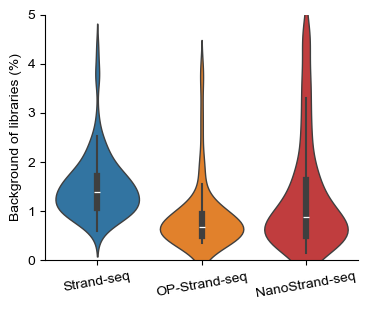

In [7]:
plt.figure(figsize=(3.8, 3.2))
ret = sns.violinplot(data=df, hue="Method", x="Method", y="Background", linewidth=1, density_norm="width", palette=["C0", "C1", "C3"])
colors = ["C0", "C1", "C3"]
plt.xlabel(None)
plt.xticks(rotation=10)
plt.ylabel("Background of libraries (%)")
plt.ylim(0, 5)
# plt.grid(axis="y", lw=1, ls="--")
ret.spines["top"].set_visible(False)
ret.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/cell_background.violinplot.pdf", dpi=300)

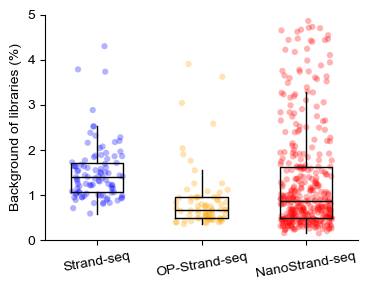

In [8]:
np.random.seed(0)
colors = ["blue", "orange", "red"]
plt.figure(figsize=(3.8, 3))
w = 0.5
for x, dat in enumerate(array):
    ys = dat["Background"]
    plt.boxplot([ys], positions=[x], widths=w, 
                showfliers=False, showcaps=False,
                medianprops={"color": "black"}, zorder=10)
    xs = np.random.random(len(ys)) * w - w/2 + x
    plt.scatter(xs, ys, marker="o", s=20, color=colors[x], edgecolor="none", alpha=0.3, clip_on=False)
plt.xticks(np.arange(3), ["Strand-seq", "OP-Strand-seq", "NanoStrand-seq"], rotation=10)
plt.ylim(0, 5)
plt.ylabel("Background of libraries (%)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/cell_background.pdf", dpi=300)